In [1]:
import sys
sys.path.append('../../preprocess_assets/')

In [2]:
# Main libraries 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# Our files
from data_shuffling_split import *
from features_extraction import *
from ara_vec_preprocess_configs import *
from ml_modeling import *

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
strat_train_set = read_file("train/strat_train_set.csv")
strat_train_set.head()

,label,text
0,1,مع انتشار الامراض ومنها الكورونا اليكم النصيحه...
1,0,1 دراسه بحثيه صادره معهد الدراسات الاستراتيجي...
2,1,بدات في مدينه وهان في الصين انتقلت لبعض المقاط...
3,1,coronarvirus CoronaOutbreak فيروس_كورونا
4,1,الاداره_العامه_للطيران_المدني اجراءات وقاءيه ح...


In [4]:
x_train_text, x_val_text, y_train, y_val = prepare_data(strat_train_set)

The number of instances in the training data after StratifiedShuffleSplit are:  8643
The number of instances in the testing data after StratifiedShuffleSplit are:   177
The number of trainin instances:  8643
The number of validation instances:  177
The number of trainin labels :  8643
The number of validation labels :  177


In [5]:
x_train_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(x_train_text)

print("Before Tokenization : \n", x_train_text[:3])
print("="*50)
print("After Tokenization : \n", x_train_text_tokenized[:3])
print("="*50)

x_val_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(x_val_text)

print("Before Tokenization : \n", x_val_text[:3])
print("="*50)
print("After Tokenization : \n", x_val_text_tokenized[:3])

fullgram_x_train_text_tokenized = get_all_ngrams(x_train_text_tokenized)
print("full gram tokenization : \n", fullgram_x_train_text_tokenized[:3])
print("="*50)
fullgram_x_val_text_tokenized = get_all_ngrams(x_val_text_tokenized)
print("full gram tokenization : \n", fullgram_x_val_text_tokenized[:3])
print("="*50)

Before Tokenization : 
 ['ما جاوبتني نفس الوجوه نفس الحكومه شمعني مره ما حتبوك الفلوس اكبر نغوله عبالك شنو الصين حتحاسبهم ', 'خلي روحك رياضيه لا ايران ولا امريكا جلبو الديمقراطيه للعراق الاساس والازمه العراقيه مستمره في ظل غياب المشروع الوطني ينهض كما نهضت الصين وكوريا واليابان العرب خارج العصر الايدولجيات المنتهيه الصلاحيه ونخبهم المغروره', 'نبيهم ينزلون ريفيليشنز ثري ويعطونا قصه ماتكون في جزيره تكرار ولا في مدينه ولله خلاص نبي نشوف عن واحد له منصب كبير في ويكون متعاون مع امبريلا ويخطط معها يسبب في تفشي الوباء في المقر حقهم عاد يكملون هم بقيه السيناريو يعني اكشن ٢٠ ']
After Tokenization : 
 [['ما', 'جاوبتني', 'نفس', 'الوجوه', 'نفس', 'الحكومه', 'شمعني', 'مره', 'ما', 'حتبوك', 'الفلوس', 'اكبر', 'نغوله', 'عبالك', 'شنو', 'الصين', 'حتحاسبهم'], ['خلي', 'روحك', 'رياضيه', 'لا', 'ايران', 'ولا', 'امريكا', 'جلبو', 'الديمقراطيه', 'للعراق', 'الاساس', 'والازمه', 'العراقيه', 'مستمره', 'في', 'ظل', 'غياب', 'المشروع', 'الوطني', 'ينهض', 'كما', 'نهضت', 'الصين', 'وكوريا', 'واليابان', 'العرب', 'خارج', 'العص

In [6]:
# Get how many words inside each text after tokenization
num_of_words_in_each_text = [len(text) for text in fullgram_x_train_text_tokenized]
max_len = max(num_of_words_in_each_text)
print("The max length is: ", max_len)
num_of_words_in_each_text[:10]

The max length is:  237


[48, 96, 129, 42, 57, 126, 12, 33, 21, 36]

The number of keys before removing are:  63
The number of keys after removing some of them are:  47


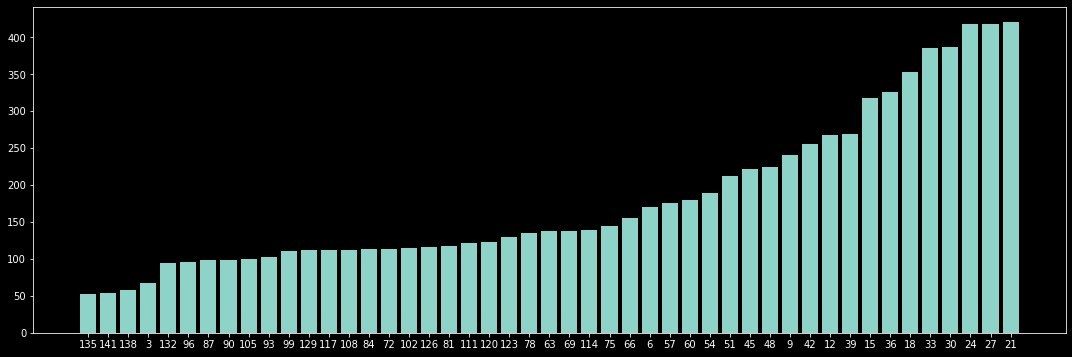

In [9]:
# count how many times these value repeated and sort them
new_dicts = get_keys_that_val_gr_than_num(num_of_words_in_each_text, 50)
keys = list(new_dicts.keys())
values = list(new_dicts.values())
plt.style.use('dark_background')
fig = plt.gcf()
fig.set_size_inches(18.5, 6)
plt.bar(range(len(new_dicts)), values, tick_label=keys)
plt.show()

# Our CBOW Word2Vec Model

In [10]:
our_word2vec_model = load_word2vec_model("../word2vec_models/rezk/skipgram_NS/sk_gr_negative_sampeling_fullgram_vec_size_300-d_min_count_100")

In [11]:
number_of_features = 300
max_len_str = 237
word2vec_path = "rezk/skipgram_NS/"
model_path_to_save = "../ml_models_saved/"
estimators = voting_models()

X_train_embed_matrix = text_to_matrix_using_word2vec(our_word2vec_model, fullgram_x_train_text_tokenized, max_len_str)
X_val_embed_matrix = text_to_matrix_using_word2vec(our_word2vec_model, fullgram_x_val_text_tokenized, max_len_str)

print(X_train_embed_matrix.shape)
print("="*50)
print(X_val_embed_matrix.shape)
print("="*50)

(8643, 237, 300)
(8643, 71100)
[-1.4209e-01 -5.7648e-02 -2.1655e-01  1.8848e-01 -1.1725e-01 -2.6367e-01
 -5.2605e-03  3.3936e-02  2.4634e-01  3.2104e-02  5.2826e-02  3.0065e-04
  7.6904e-02 -1.0834e-01 -2.4216e-02  1.5601e-01  2.0935e-01 -2.3914e-01
 -1.2769e-01 -3.5059e-01 -2.2995e-02 -1.7297e-01 -7.0374e-02  6.0822e-02
  2.8564e-02 -2.4683e-01  4.9469e-02  2.9282e-02 -2.6660e-01 -1.2756e-01
  2.7124e-01 -1.6357e-01  1.7078e-01 -1.4563e-01 -6.8481e-02  1.3013e-01
  6.5552e-02  1.4343e-01  2.7808e-01 -7.5674e-04 -2.3987e-01  2.9968e-02
 -1.0907e-01 -3.5205e-01  2.2876e-01  2.4219e-01 -3.6743e-02  2.2375e-01
 -2.0309e-02 -6.7993e-02]
(177, 237, 300)
(177, 71100)
[-1.1703e-02 -1.1072e-01 -3.3203e-02  1.5625e-01 -2.6587e-01 -2.9785e-01
  1.0144e-01  2.5903e-01 -2.5986e-02 -1.1633e-01 -1.1334e-01  1.3342e-01
  1.1078e-01 -2.1265e-01  1.5515e-01  9.7046e-02  7.2815e-02 -3.5187e-02
  5.2917e-02 -7.5562e-02 -1.4000e-02 -1.3708e-01 -7.4097e-02 -8.6899e-03
 -1.1009e-04 -2.6440e-01 -1.0474e-01 -

In [12]:
# Train Logistic Regression

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs', verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

print("=" * 50)

# Train SVC

model = LinearSVC(C=0.5,  max_iter=50, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)


# AdaBoost 
print("=" * 50)


model = LinearSVC(C=0.5,  verbose=1)
model = AdaBoostClassifier(model,  algorithm="SAMME", n_estimators=5)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

#  Gradient Boosting
print("=" * 50)

model = GradientBoostingClassifier(n_estimators=10, subsample=.1, learning_rate=.5,   max_depth=5, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       142202     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99087D+03    |proj g|=  4.53500D+02


 This problem is unconstrained.



At iterate   50    f=  2.09654D+02    |proj g|=  2.68755D+00

At iterate  100    f=  2.01179D+02    |proj g|=  4.17258D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    112      1     0     0   4.173D-02   2.012D+02
  F =   201.17856918411724     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
===================== Validate Result =====================
F1 score is:  0.8983050847457628
It takes to run:  0:01:22.065151


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


[LibLinear].....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -34.459328
nSV = 2859
===================== Validate Result =====================
F1 score is:  0.8870056497175142
It takes to run:  0:00:10.123377


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear].*
optimization finished, #iter = 12
Objective value = -0.317971
nSV = 8178
[LibLinear].*
optimization finished, #iter = 11
Objective value = -0.406193
nSV = 8562
[LibLinear].
optimization finished, #iter = 10
Objective value = -0.413262
nSV = 8643
[LibLinear].
optimization finished, #iter = 10
Objective value = -0.437766
nSV = 8643
[LibLinear]
optimization finished, #iter = 9
Objective value = -0.444185
nSV = 8643
===================== Validate Result =====================
F1 score is:  0.9378531073446328
It takes to run:  0:00:59.488991
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.0090           0.0498           23.39s
         2           0.9360           0.0145           20.48s
         3           0.9661           0.0221           18.21s
         4           0.8383          -0.0109           15.31s
         5           0.8199          -0.0387           12.85s
         6           0.8606          -0.4523           10.30s
         

# Load best model & predict test set

In [13]:
strat_test_set = read_file("test/strat_test_set.csv")
strat_test_set.head()

,label,text
0,1,حساء خفافيش الصين ابداع القرف يعني
1,1,اجراءات هكذا استعدت مصر لمواجهه فيروس كورونا م...
2,1,ايش الفايده لابس كمامات ومو لابس قفازات
3,0,الجدير بالذكر ان في الصين بيستخدموا ال في كل ح...
4,0,ولو ترسل صواريخ الصين وقفنا دون برج الفيصليه


In [14]:
X_test_text = list(strat_test_set['text'])
y_test = strat_test_set['label'].values

In [15]:
X_test_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(X_test_text)

print("Before Tokenization : \n", X_test_text[:3])
print("="*50)
print("After Tokenization : \n", X_test_text_tokenized[:3])
print("="*50)

fullgram_X_test_text_tokenized = get_all_ngrams(X_test_text_tokenized)
print("full gram tokenization : \n", fullgram_X_test_text_tokenized[:3])
print("="*50)

Before Tokenization : 
 ['حساء خفافيش الصين ابداع القرف يعني', 'اجراءات هكذا استعدت مصر لمواجهه فيروس كورونا مرايتي', 'ايش الفايده لابس كمامات ومو لابس قفازات']
After Tokenization : 
 [['حساء', 'خفافيش', 'الصين', 'ابداع', 'القرف', 'يعني'], ['اجراءات', 'هكذا', 'استعدت', 'مصر', 'لمواجهه', 'فيروس', 'كورونا', 'مرايتي'], ['ايش', 'الفايده', 'لابس', 'كمامات', 'ومو', 'لابس', 'قفازات']]
full gram tokenization : 
 [['حساء', 'خفافيش', 'الصين', 'ابداع', 'القرف', 'يعني', 'حساء_خفافيش', 'خفافيش_الصين', 'الصين_ابداع', 'ابداع_القرف', 'القرف_يعني', 'حساء_خفافيش_الصين', 'خفافيش_الصين_ابداع', 'الصين_ابداع_القرف', 'ابداع_القرف_يعني'], ['اجراءات', 'هكذا', 'استعدت', 'مصر', 'لمواجهه', 'فيروس', 'كورونا', 'مرايتي', 'اجراءات_هكذا', 'هكذا_استعدت', 'استعدت_مصر', 'مصر_لمواجهه', 'لمواجهه_فيروس', 'فيروس_كورونا', 'كورونا_مرايتي', 'اجراءات_هكذا_استعدت', 'هكذا_استعدت_مصر', 'استعدت_مصر_لمواجهه', 'مصر_لمواجهه_فيروس', 'لمواجهه_فيروس_كورونا', 'فيروس_كورونا_مرايتي'], ['ايش', 'الفايده', 'لابس', 'كمامات', 'ومو', 'لابس', 'قفاز

In [16]:
rezk_model = pickle_load_model("../ml_models_saved/rezk/skipgram_NS/AdaBoostClassifier__f1_0.938_ml.sav"  )
X_test_embed_matrix = text_to_matrix_using_word2vec(our_word2vec_model, fullgram_X_test_text_tokenized, max_len_str)
f1_score_result(rezk_model, X_test_embed_matrix, y_test)

(180, 237, 300)
(180, 71100)
[-3.567e-04 -8.929e-02  2.818e-02  2.356e-01  1.252e-01  3.792e-03
 -2.191e-02  5.156e-01  1.274e-01 -2.681e-01 -3.408e-01 -1.803e-01
 -1.157e-01  1.272e-01 -3.137e-01 -2.996e-01  1.681e-01 -7.983e-02
 -1.969e-01 -5.366e-01 -3.218e-03 -3.503e-01  2.489e-01 -1.070e-01
  4.443e-01  1.738e-02 -2.444e-01 -5.503e-01 -3.960e-01  3.381e-01
  1.674e-01 -5.487e-02  3.347e-01  1.087e-01  2.939e-01  1.553e-01
  3.411e-01  2.720e-01  3.496e-03 -2.512e-01  2.664e-01  2.593e-01
  8.331e-02 -1.775e-01  2.263e-01  1.796e-01  1.604e-01 -5.878e-02
  2.223e-01  3.082e-02]
===================== Validate Result =====================
F1 score is:  0.9333333333333333


0.933

# Qualitative Evaluation

In [17]:
print("The number of words the model learn from your dataset are:", len(list(our_word2vec_model.wv.index_to_key)))

The number of words the model learn from your dataset are: 2027042


In [18]:
our_word2vec_model.wv.most_similar('قابس')

[('تطاوين', 0.6648058891296387),
 ('بنزرت', 0.6583719849586487),
 ('بصفاقس', 0.6510608196258545),
 ('توزر', 0.6484861969947815),
 ('بنقردان', 0.6472850441932678),
 ('الصويره', 0.6449536681175232),
 ('جندوبه', 0.6360098123550415),
 ('صفاقس', 0.6333075761795044),
 ('سبيطله', 0.6281508207321167),
 ('سليانه', 0.6279425024986267)]

In [19]:
our_word2vec_model.wv.most_similar('طنطا')

[('المنصوره', 0.8299264311790466),
 ('دمياط', 0.8005159497261047),
 ('اسيوط', 0.7954678535461426),
 ('اسكندريه', 0.7901728749275208),
 ('الزقازيق', 0.7898871898651123),
 ('دمنهور', 0.7801265120506287),
 ('المنوفيه', 0.7553756237030029),
 ('دكرنس', 0.7479355931282043),
 ('كفرالشيخ', 0.7469829320907593),
 ('منوف', 0.7407668828964233)]

In [20]:
our_word2vec_model.wv.most_similar('فندق')

[('منتجع', 0.7309461832046509),
 ('بفندق', 0.7221202850341797),
 ('الفندق', 0.7167258262634277),
 ('فنادق', 0.6945282816886902),
 ('وفندق', 0.6830044388771057),
 ('مطعم', 0.6784963607788086),
 ('اوتيل', 0.6647961139678955),
 ('ريجنسي', 0.6591891646385193),
 ('هيلتون', 0.6585381031036377),
 ('الماريوت', 0.6529659032821655)]

In [21]:
our_word2vec_model.wv.most_similar('🤣')

[('😂', 0.9064841866493225),
 ('😆', 0.8982240557670593),
 ('😅', 0.8962749242782593),
 ('😁', 0.8947716355323792),
 ('😜', 0.8738267421722412),
 ('هه', 0.8605387806892395),
 ('😄', 0.8536892533302307),
 ('😀', 0.8396627902984619),
 ('😝', 0.8366069197654724),
 ('😬', 0.8360880613327026)]

In [22]:
our_word2vec_model.wv.most_similar('🇰🇼')

[('الكويت', 0.7159113883972168),
 ('العيد_الوطني_الكويتي', 0.7136905193328857),
 ('🇶🇦', 0.7015846967697144),
 ('🇦🇪', 0.6887887716293335),
 ('🇧🇭', 0.6830284595489502),
 ('العيد_الوطني_الكويت', 0.6595523357391357),
 ('كويت', 0.6460120677947998),
 ('🇴🇲', 0.6392191052436829),
 ('كويتنا', 0.6384673714637756),
 ('🇸🇦', 0.6337781548500061)]

In [23]:
our_word2vec_model.wv.most_similar('IT')

[('Business', 0.590499758720398),
 ('students', 0.5713825821876526),
 ('تمريض', 0.5685644745826721),
 ('HR', 0.5659223198890686),
 ('manager', 0.5659052729606628),
 ('logic', 0.5651146173477173),
 ('Digital', 0.5550553798675537),
 ('AI', 0.553292989730835),
 ('bank', 0.5529889464378357),
 ('الهندسه', 0.5518815517425537)]

In [24]:
our_word2vec_model.wv.most_similar('؟')

[('!', 0.8230187892913818),
 ('🤔', 0.8202351331710815),
 ('هل', 0.7557244896888733),
 ('🙄', 0.7118368744850159),
 ('يعني', 0.7100118398666382),
 ('?', 0.7048540711402893),
 ('والا', 0.6845880150794983),
 ('😕', 0.6832936406135559),
 ('وهل', 0.6822245121002197),
 ('ليه', 0.6792043447494507)]

In [25]:
our_word2vec_model.wv.most_similar('🌸')

[('🌼', 0.9097651839256287),
 ('🌻', 0.8927158117294312),
 ('🌺', 0.8896058201789856),
 ('🌷', 0.8834307193756104),
 ('🍃', 0.8677099943161011),
 ('🌹', 0.8668521046638489),
 ('🌿', 0.8584415316581726),
 ('💕', 0.844450056552887),
 ('🕊️', 0.8279404640197754),
 ('🕊', 0.8244357109069824)]

In [26]:
our_word2vec_model.wv.most_similar('لقاح_كورونا')

[('لقاح_فايزر', 0.7672062516212463),
 ('لقاح', 0.7458565831184387),
 ('من_لقاح', 0.7216305136680603),
 ('لقاح_كوفيد', 0.7191676497459412),
 ('اللقاح', 0.7169901728630066),
 ('الجرعه_الثانيه', 0.7037858963012695),
 ('فايزر', 0.6989876627922058),
 ('لقاح_#', 0.6949324011802673),
 ('جرعات_لقاح', 0.6942309737205505),
 ('لقاحات_كورونا', 0.6936680674552917)]

In [27]:
our_word2vec_model.wv.most_similar('covid')

[('Covid', 0.6872597336769104),
 ('كوفيد', 0.6755706667900085),
 ('كورونا', 0.674052357673645),
 ('coronavirus', 0.6679577827453613),
 ('كوفيد_', 0.6577050685882568),
 ('فيروس', 0.6268614530563354),
 ('corona', 0.62137770652771),
 ('COVID', 0.6201250553131104),
 ('Corona', 0.6114001274108887),
 ('كورونا،', 0.6103721261024475)]

In [28]:
our_word2vec_model.wv.most_similar('covid_19')

[('#_covid_19', 0.6256928443908691),
 ('#_covid', 0.6221465468406677),
 ('Corona_#', 0.6191930770874023),
 ('COVID_2019', 0.6120616793632507),
 ('COVID__', 0.6003709435462952),
 ('#_كورونا_فيروس', 0.5996192693710327),
 ('Covid__', 0.5974095463752747),
 ('#_كورونا', 0.5971654057502747),
 ('COVID_19', 0.5969985127449036),
 ('#_coronavirus', 0.5963916182518005)]

In [29]:
our_word2vec_model.wv.most_similar('بايدن')

[('ترامب', 0.8512554168701172),
 ('ترمب', 0.8102423548698425),
 ('بوتين', 0.7791876196861267),
 ('نتنياهو', 0.7762749791145325),
 ('بايدن،', 0.7634655833244324),
 ('اردوغان', 0.7474371790885925),
 ('تيلرسون', 0.7437020540237427),
 ('بلينكن', 0.7419249415397644),
 ('واشنطن', 0.7402883768081665),
 ('ترامب،', 0.7355116009712219)]

In [30]:
our_word2vec_model.wv.most_similar('في_صحيح_البخاري')

[('صحيح_البخاري_و', 0.6662893295288086),
 ('النبي_صلي_الله', 0.6549474596977234),
 ('صحيح_مسلم_د', 0.6421710848808289),
 (':_ان_رسول', 0.6366793513298035),
 ('الرسول_صلي_الله', 0.6311498880386353),
 ('عليه_وسلم_انه', 0.6299081444740295),
 ('محمد_في_صحيح', 0.629696786403656),
 ('الله_عليه_وسلم', 0.6287017464637756),
 ('في_الحديث_الصحيح', 0.6277386546134949),
 ('عليه_وسلم_علي', 0.6264953017234802)]

In [31]:
our_word2vec_model.wv.most_similar('الي_يوم_القيامه')

[('يوم_القيامه_.', 0.6319121718406677),
 ('يوم_القيامه_#', 0.6033729314804077),
 ('يوم_القيامه_)', 0.586989164352417),
 ('يوم_القيامه_و', 0.5667398571968079),
 ('اجمعين_الي_يوم', 0.5624067783355713),
 ('فعليه_لعنه_الله', 0.5587624311447144),
 ('فزع_يوم_القيامه', 0.5565203428268433),
 ('يوم_القيامه_،', 0.5538339018821716),
 ('يوم_الدين_اللهم', 0.5517250299453735),
 ('ان_تقوم_الساعه', 0.5501059889793396)]

In [32]:
our_word2vec_model.wv.most_similar('اليهود_الصهاينه')

[('الصهاينه_و', 0.6714180111885071),
 ('اليهود_و', 0.6466207504272461),
 ('علي_اليهود_و', 0.6168356537818909),
 ('الصهاينه_المحتلين', 0.6167996525764465),
 ('و_المطبعين', 0.6118593215942383),
 ('الصهاينه_#', 0.6079138517379761),
 ('اخواننا_الفلسطينين', 0.6048346757888794),
 ('قتله_الانبياء', 0.6038330793380737),
 ('من_اليهود', 0.6000148057937622),
 ('المتصهينين_العرب', 0.5987120270729065)]

In [33]:
our_word2vec_model.wv.most_similar('بن_خلدون')

[('ابن_خلدون', 0.6284151673316956),
 ('بن_محمود', 0.5491104125976562),
 ('بن_باديس', 0.5423383712768555),
 ('في_الاندلس', 0.5416474342346191),
 ('بن_نصير', 0.5317039489746094),
 ('بن_سبا', 0.5191484689712524),
 ('يوسف_بن', 0.5127493143081665),
 ('بن_سليمان', 0.5127357244491577),
 ('عمرو_بن', 0.5123283863067627),
 ('ابن_رشد', 0.510941743850708)]

In [34]:
from word2vec_results import *

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 1.988188
[t-SNE] KL divergence after 50 iterations with early exaggeration: 36.170048
[t-SNE] KL divergence after 500 iterations: 0.035765
The shape of our word_features is: (19, 2)


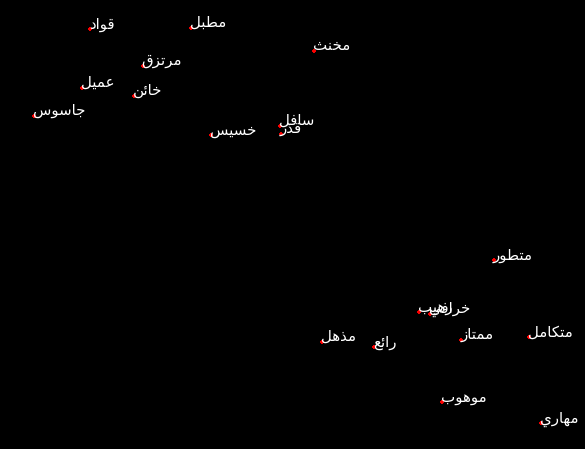

In [45]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(our_word2vec_model, SENTIMENT_WORDS, 500, .05)

_ = init_graph_style()

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(SENTIMENT_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 65 samples in 0.000s...
[t-SNE] Computed neighbors for 65 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 65 / 65
[t-SNE] Mean sigma: 1.739490
[t-SNE] KL divergence after 100 iterations with early exaggeration: 50.201084
[t-SNE] KL divergence after 1400 iterations: 0.180871
The shape of our word_features is: (65, 2)


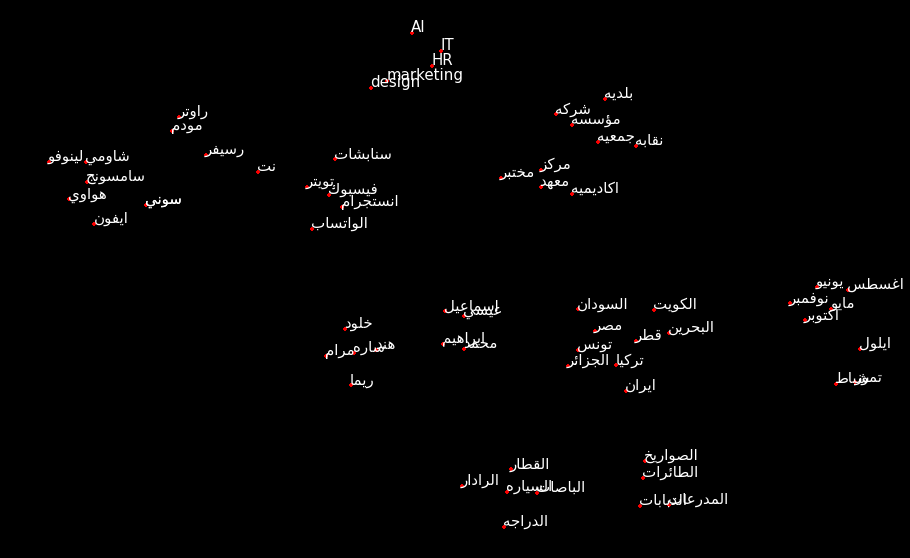

In [39]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(our_word2vec_model, NER_WORDS, 1400, .09)

_ = init_graph_style(figsize=(16, 10))

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(NER_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")